# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [2]:
# Busqueda por costo.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [3]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


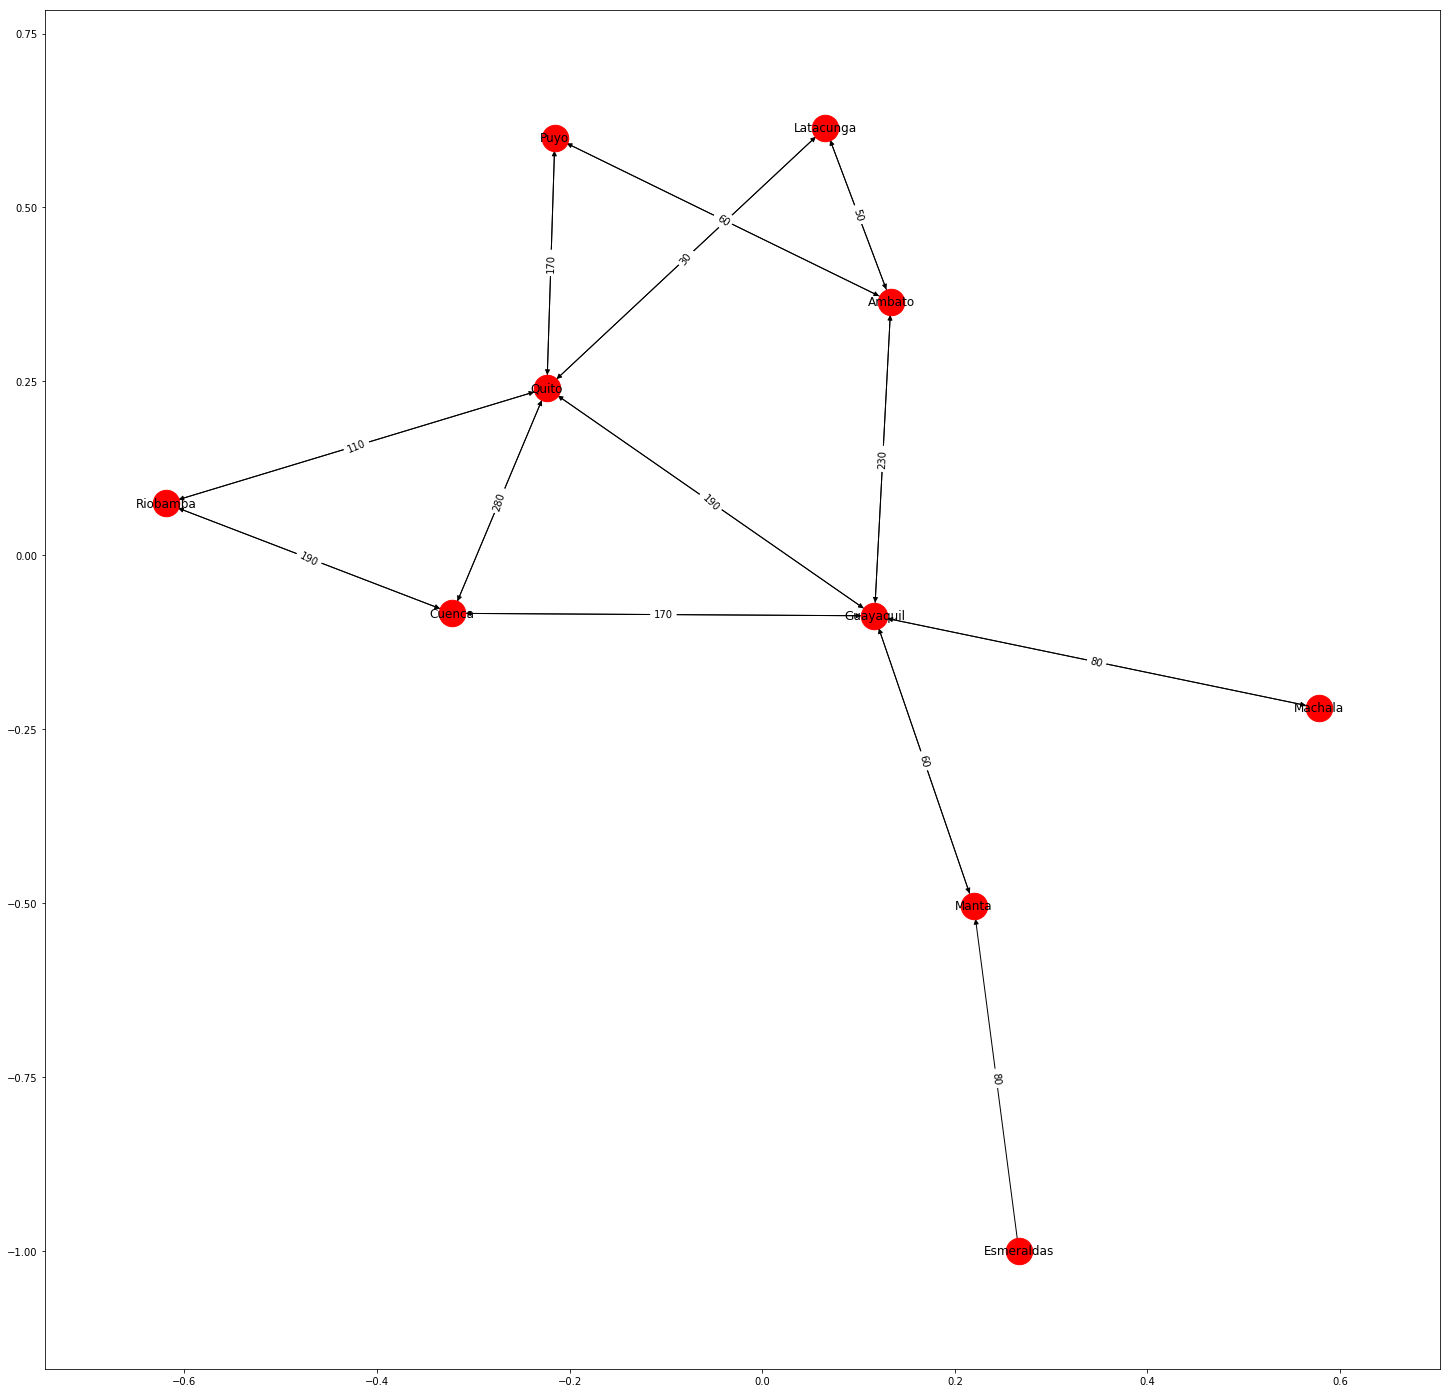

In [9]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    
    
    def graficarNodos(conectores):
        grafic = nx.DiGraph()
        grafic.add_nodes_from(conectores)
        for key, lista in conectores.items():
            for i in lista:
                grafic.add_edge(key,i, km=str(lista[i])+"")
                
        plt.figure(figsize=(25,25))  
        pos=nx.spring_layout(grafic)
        edge_labels = nx.get_edge_attributes(grafic,'km')   
        nx.draw_networkx_edge_labels(grafic, pos, edge_labels = edge_labels) 
        nx.draw_networkx(grafic, pos, node_size=700, labels={node:node for node in grafic.nodes()})
        plt.show()
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr    
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
              
    else:
        print("No hay solucion !!!!")
        
        
    graficarNodos(connections)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.




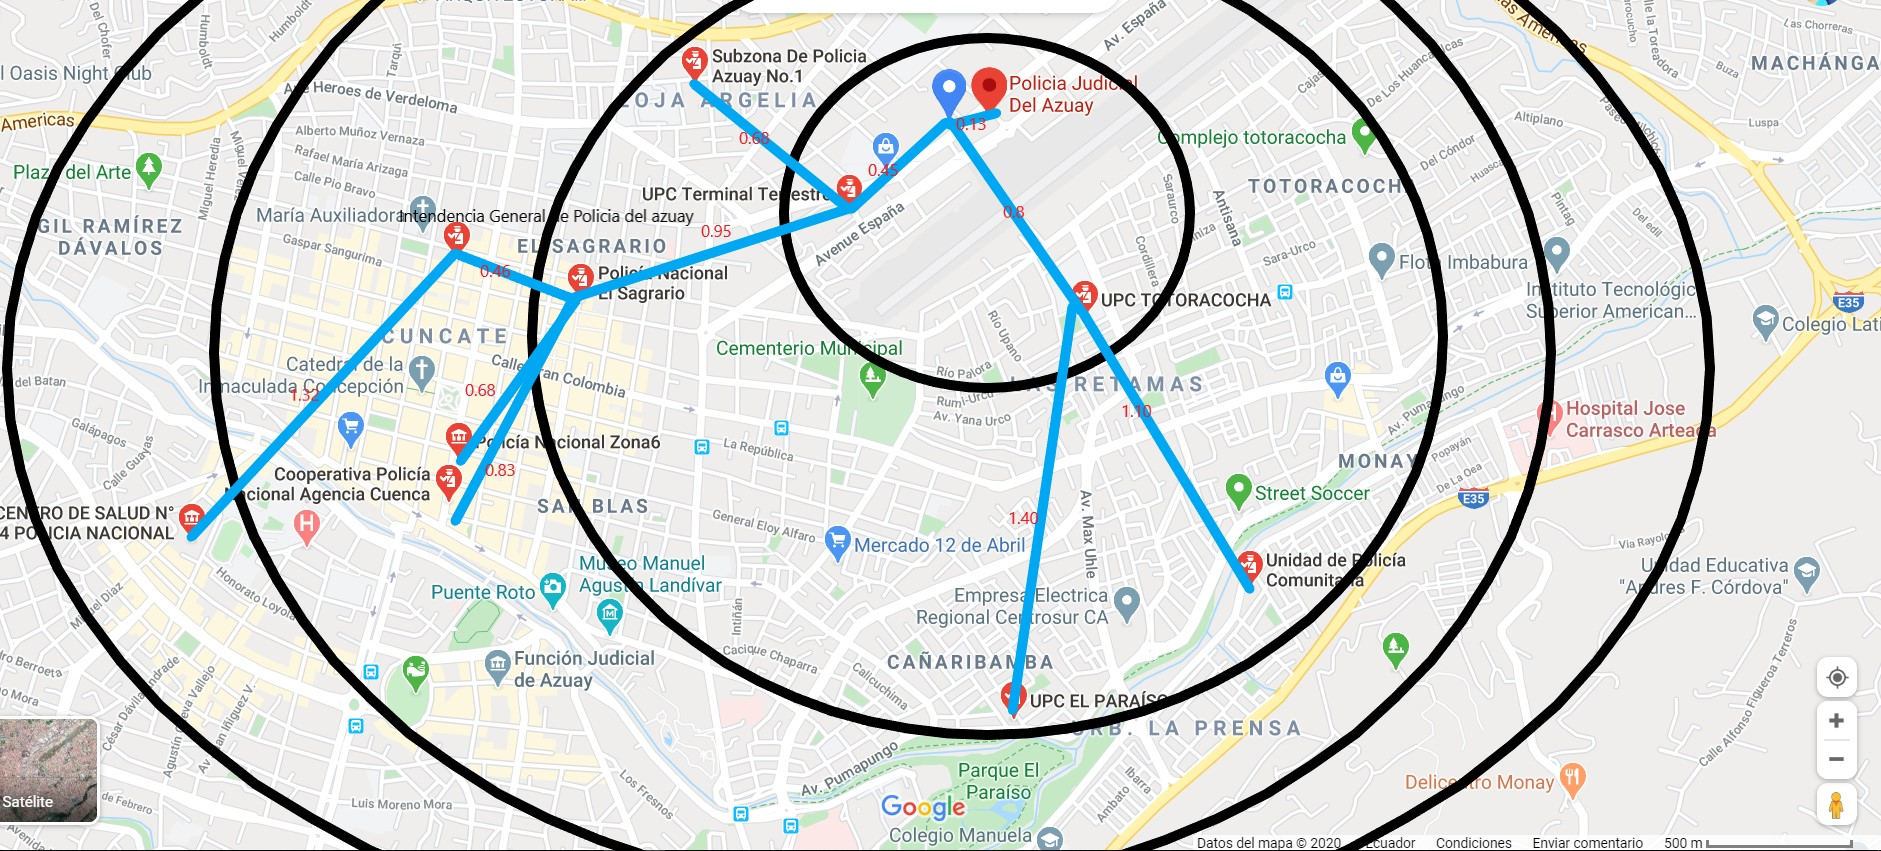



['Casa', 'UPC Terminal Terrestre', 'Policia Nacional El Sagrario']
Costo total: 1.4


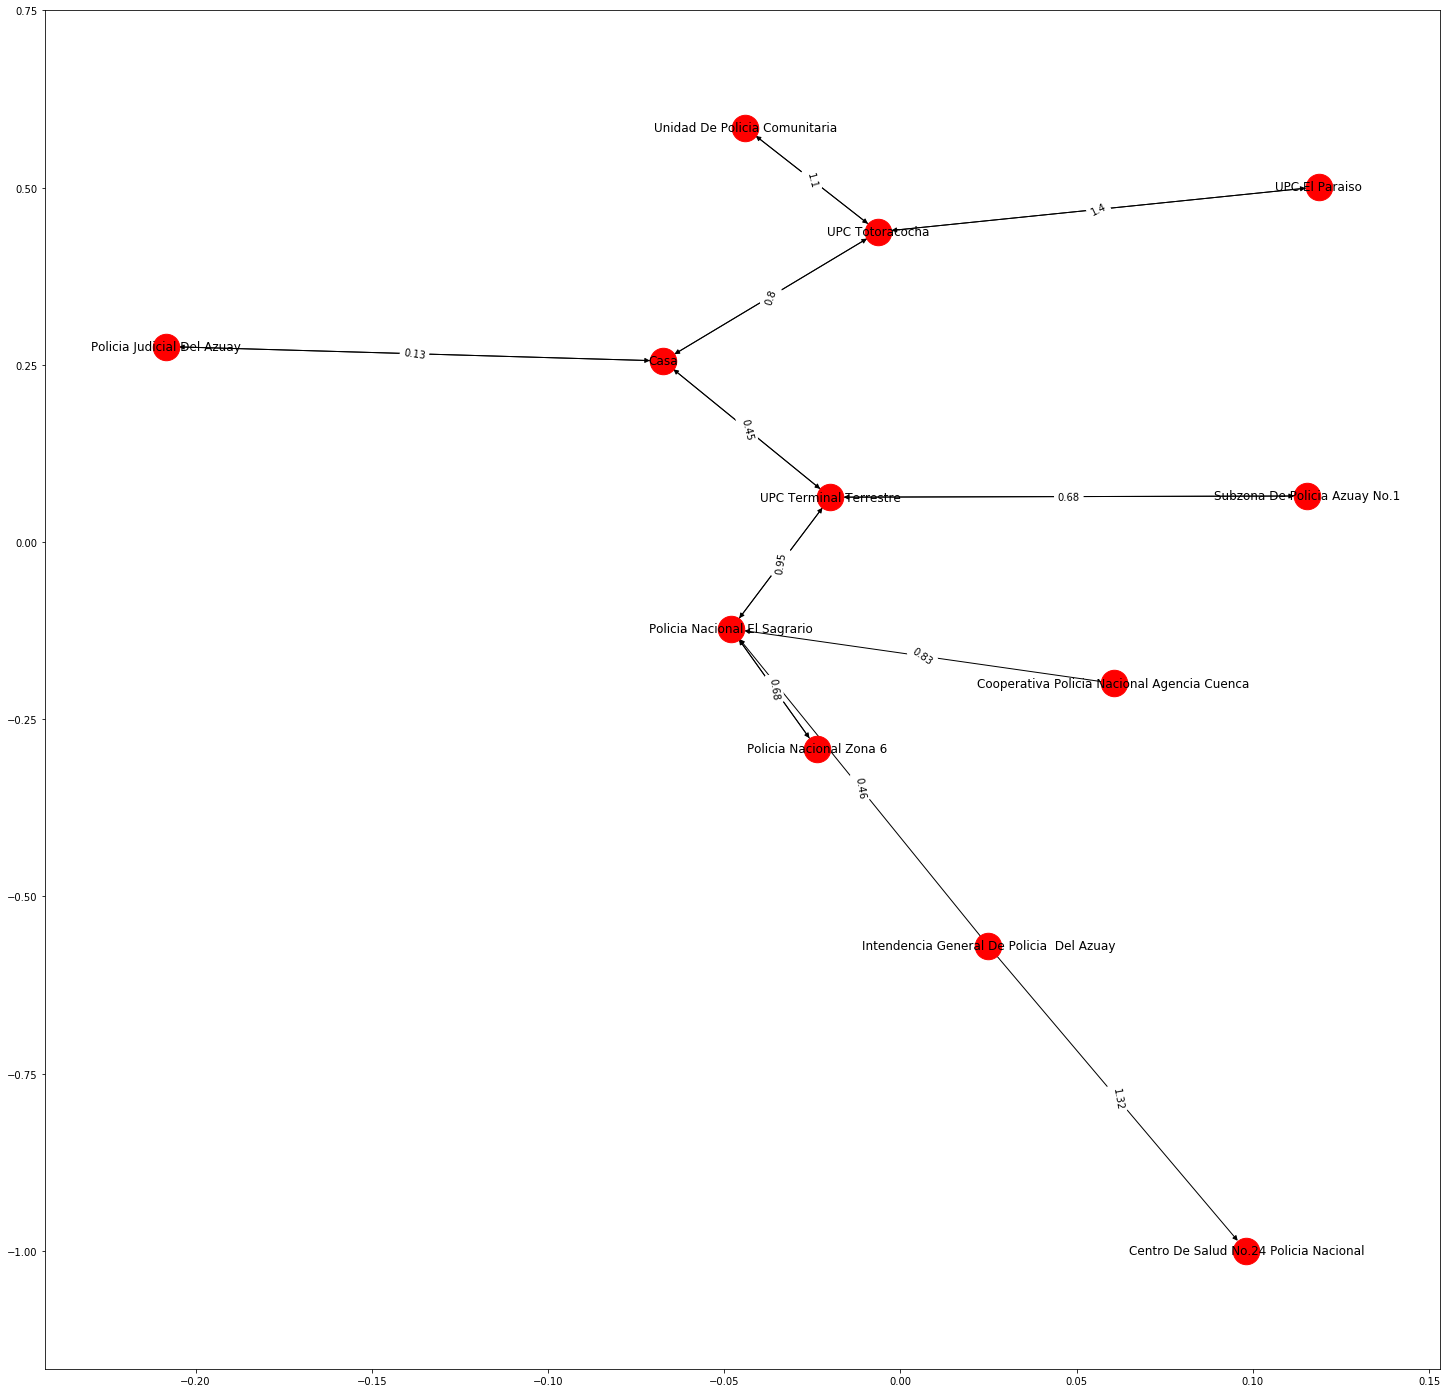

In [10]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connectionsPolice = {
        'Casa': {'Policia Judicial Del Azuay':0.13, 'UPC Totoracocha':0.80, 'UPC Terminal Terrestre':0.45},
        'Policia Judicial Del Azuay': {'Casa':0.13},
        'UPC Totoracocha': {'Casa':0.80,'Unidad De Policia Comunitaria':1.10,'UPC El Paraiso':1.40},
        'Unidad De Policia Comunitaria': {'UPC Totoracocha':1.10},
        'UPC El Paraiso': {'UPC Totoracocha':1.40},
        'UPC Terminal Terrestre': {'Casa':0.45,'Subzona De Policia Azuay No.1':0.68,'Policia Nacional El Sagrario':0.95},
        'Subzona De Policia Azuay No.1': {'UPC Terminal Terrestre':0.68},
        'Policia Nacional El Sagrario': {'UPC Terminal Terrestre':0.95,'Policia Nacional Zona 6':0.68},
        'Intendencia General De Policia  Del Azuay': {'Policia Nacional El Sagrario':0.46,'Centro De Salud No.24 Policia Nacional':1.32},
        'Policia Nacional Zona 6': {'Policia Nacional El Sagrario':0.68},
        'Cooperativa Policia Nacional Agencia Cuenca': {'Policia Nacional El Sagrario':0.83}
    }

    init_state = 'Casa'
    solution = 'Policia Nacional El Sagrario'
    solution_node = search_costo_solucion(connectionsPolice, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo

    else:
        print("No hay solucion !!!!")
        
    graficarNodos(connectionsPolice)

# Solucion

    Factor de Ramificacion 
    
    b = TotalNodos / d
    b = 12 / 5
    b = 2.4
    
    
    Completitud: es completo ya que contara la solucion siempre y cuando se cuente con los recursos necesario como memoria y       procesamiento.
    
    Optimidad: Es optimo ya que devuelve la solucion con un menor coste en un tiempo corto
    
    Complejidad temporal:
    
    O(b^n)
    2.4^12
    36520.34
    
    
    Complejidad Espacial:
    O(b*n)
    2.4*12
    28.8
    

# Practica

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.

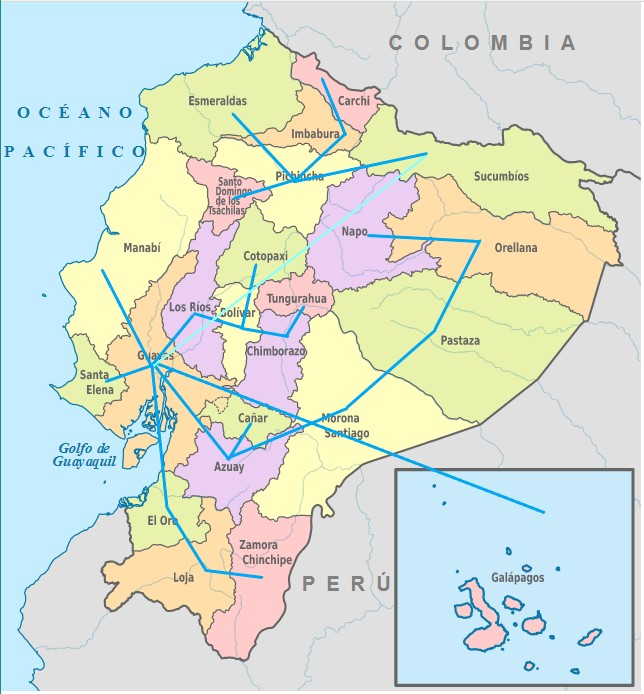


['Imbabura', 'Pichincha']
Numero de Contagiados: 736


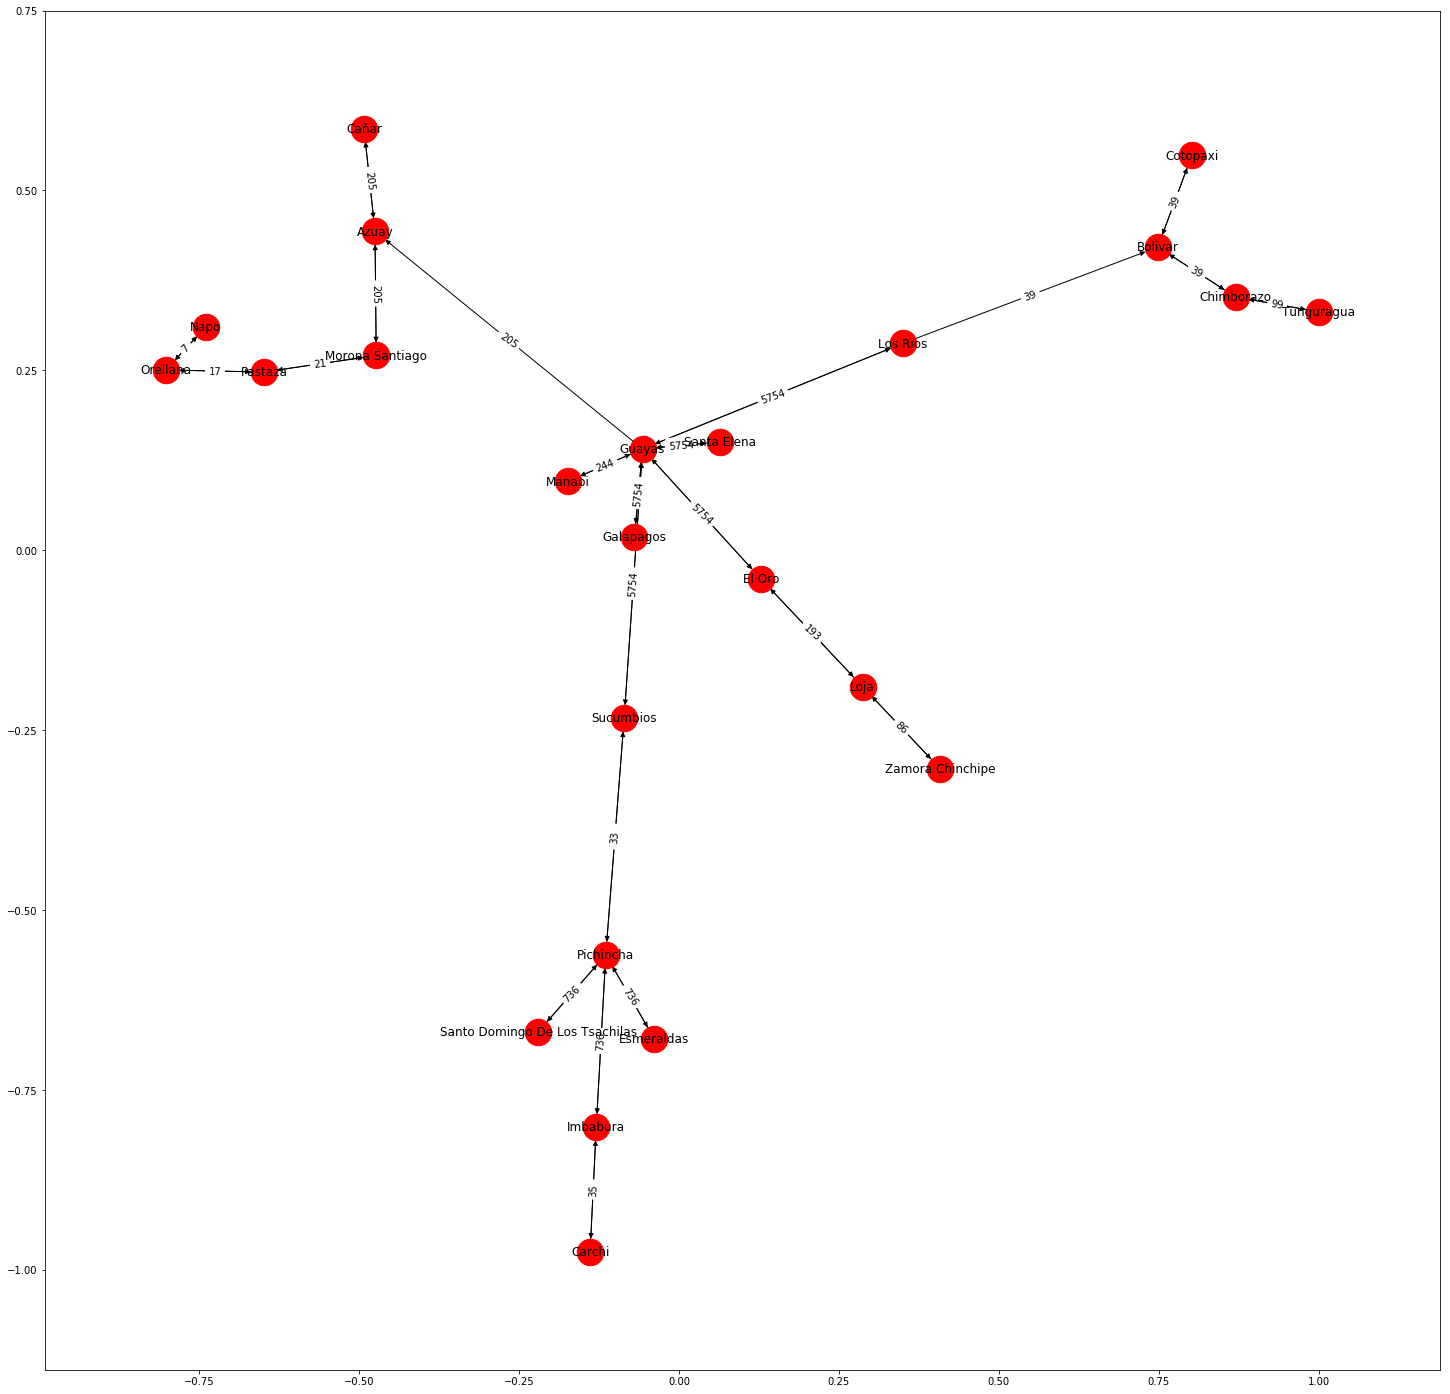

In [14]:
#Implementar
if __name__ == "__main__":
    connectionsCovid = {
        'Guayas': {'Los Rios':274 , 'Manabi':244, 'Galapagos':11, 'Santa Elena':95, 'El Oro':193, 'Azuay':205, 'Sucumbios':33},
        'Los Rios': {'Guayas':5754, 'Bolivar':39},
        'Bolivar': {'Cotopaxi':46, 'Chimborazo':99},
        'Chimborazo': {'Tunguragua':53, 'Bolivar':39},
        'Tunguragua': {'Chimborazo':99},
        'Cotopaxi': {'Bolivar':39},
        'Galapagos': {'Guayas':5754},
        'Santa Elena': {'Guayas':5754},
        'El Oro': {'Loja':86, 'Guayas':5754},
        'Loja': {'Zamora Chinchipe':5, 'El Oro':193},
        'Zamora Chinchipe': {'Loja':86},
        'Azuay': {'Cañar':117, 'Morona Santiago':21},
        'Cañar': {'Azuay':205},
        'Morona Santiago': {'Azuay':205, 'Pastaza':17},
        'Pastaza': {'Orellana':7, 'Morona Santiago':21},
        'Orellana': {'Napo':8, 'Pastaza':17},
        'Napo': {'Orellana':7},
        'Sucumbios': {'Guayas':5754, 'Pichincha':736},
        'Pichincha': {'Sucumbios':33, 'Santo Domingo De Los Tsachilas':68, 'Esmeraldas':53, 'Imbabura':35},
        'Santo Domingo De Los Tsachilas': {'Pichincha':736},
        'Esmeraldas': {'Pichincha':736},
        'Imbabura': {'Carchi':26, 'Pichincha':736},
        'Carchi': {'Imbabura':35},
        'Manabi': {'Guayas':244}
    }

    init_state = 'Imbabura'
    solution = 'Pichincha'
    solution_node = search_costo_solucion(connectionsCovid, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Numero de Contagiados: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo

    else:
        print("No hay solucion !!!!")
        
    graficarNodos(connectionsCovid)


# Conclusiones

- La busqueda por costo nos ayuda a encontrar la ruta con menor costo partiendo desde el nodo raiz hasta llegar al nodo meta.

- Se ha creado un metodo para la grafica de todos los nodos pertenecientes a las ciudades y a los lugares donde existe un departamento de policia alrededor de mi ubicacion de hogar.

- Todos los datos acerca del covid fueron cogidos hasta el corete del dia miercoles 15 de abril del 2020.

# Referencias:
    1. https://www.gestionderiesgos.gob.ec/informes-de-situacion-covid-19-desde-el-13-de-marzo-del-2020/
    2. https://www.salud.gob.ec/gacetas-epidemiologicas-coronavirus-covid-19/


